In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import csv

In [2]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='../Logs/ReplyTopicGraphs.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [3]:

Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs_Depth_fixed.pkl"
# Allgraphs_BL2 = "../Data/reddit_TheDonald/theDonald_graph/TheDonald_replygraphs.pkl"
Allgraphs_BL = "../Data/FrontPage/graphs/frontPage_replygraphs_50k.pkl"

In [4]:
Graphs_SW = pkl.load(open(Allgraphs_SW,'rb'))

In [5]:
allGraphs_SW = {}
for k in Graphs_SW:
#     print k
    if len(Graphs_SW[k]) > 10:
        allGraphs_SW[k] = Graphs_SW[k]
        

In [6]:
Graphs_BL = pkl.load(open(Allgraphs_BL,'rb'))

In [7]:
allGraphs_BL = {}
for k in Graphs_BL:
    if len(Graphs_BL[k].nodes()) > 10:
        allGraphs_BL[k] = Graphs_BL[k]
        

In [8]:
len(allGraphs_SW) , len(allGraphs_BL)

(11437, 36080)

In [9]:
def sampleGraphs(graphDict, sampleSize):
    sampled = {}
    keys = graphDict.keys()
    sampledKeys = random.sample(keys,sampleSize)
    for k in sampledKeys:
        sampled[k] = graphDict[k]
    return sampled

In [10]:
# sampled_BL = sampleGraphs(allGraphs_BL,len(allGraphs_SW))
sampled_BL = pkl.load(open("../Data/sampled_BL_reply.pkl",'rb'))
sampled_SW = allGraphs_SW #sampleGraphs(allGraphs_SW,10000)

In [11]:
import csv
def writeTextDict(textDict,fileName):
    fieldnames = ['postid', 'text']
    with open(fileName, 'wb') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        dict_writer.writeheader()
        for k in textDict:
            dict_writer.writerow({'postid': k , 'text': textDict[k]})


def getTextDict(replyGraphs):
    textDict = {}
    for k in replyGraphs:
        postText = nx.get_node_attributes(replyGraphs[k],'text')
        textDict.update(postText)
    return textDict

In [12]:
textDict_SW = getTextDict(sampled_SW)

textDict_BL = getTextDict(sampled_BL)

In [13]:
len(textDict_SW), len(textDict_BL)

(232336, 897673)

In [14]:
# writeTextDict(textDict_BL,'../Data/FrontPage/FP_Alltext_V4.csv')

In [15]:
# writeTextDict(textDict_SW,'../Data/reddit_suicideWatch/SW_Alltext_V3.csv')

In [16]:
def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [17]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [18]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [19]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [20]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [21]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [22]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [23]:
print AS_mods , len(AS_mods)

([u'shadowman3001', u'Grakmarr', u'US2A', u'sublimeinslime', u'Trumpshaker', u'zettapede', u'thunderbert80', u'Ivaginaryfriend', u'Foss_is_Boss', u'mivvan', u'Katfish29', u'IanPatrick1966', u'lalicat', u'Trumpropriation', u'Knollsit', u'richmomz', u'SportzStar', u'lolmonger', u'MorePancakes', u'D4rkd3str0yer', u'Sanotsuto', u'bh506407', u'pm_me_yo_doggos', u'CovfefeBucks', u'eGOTheJudge', u'DrWeeGee', u'Keln78', u'DanWofSoc', u'BotForceOne', u'AutoModerator', u'Medically', u'Velostodon'], [{u'author_flair_css_class': u'tomahawkmissile', u'author_flair_text': u'MHM', u'mod_permissions': [u'all'], u'date': 1495507695.0, u'id': u't2_5y6sb', u'name': u'shadowman3001'}, {u'author_flair_css_class': u'treadonme', u'author_flair_text': u'1776', u'mod_permissions': [u'all'], u'date': 1508277635.0, u'id': u't2_a9f6l', u'name': u'Grakmarr'}, {u'author_flair_css_class': u'captain', u'author_flair_text': u'MAGA', u'mod_permissions': [u'all'], u'date': 1508277639.0, u'id': u't2_uuiui', u'name': u'US

In [24]:
# LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/FrontPage/LIWC2015_FP_Alltext_V4.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC_SW_Alltext_V2.csv")

In [25]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [26]:
print len(LIWC_SW) , len(LIWC_BL)

419554 2932701


In [27]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
# LIWC_BL2.drop(LIWC_BL2.index[0])

A                                                  B   WC  \
1        t1_duqxily  None if them has won gold (only other medals) ...   31   
2        t1_dumknhz  suppose if china is going to artificially lowe...   32   
3        t1_dumknhd      Look at Chicago, what more proof do you need?    9   
4        t1_dupg974                                        Stationery*    1   
5        t1_duljt22  Isso me incomoda muito.Gaste 300 reais pra com...   31   
6        t1_durb5jy  Because the majority of people living in the c...   20   
7        t1_duit3vg  My pc is too trash  to record and play at a st...   26   
8        t1_dv6ur8x  The boy who held back the sea. Basically a you...   58   
9        t1_dujrr20  That you don't just wake up in a parallel univ...   16   
10       t1_dumek8p  God, do these people have *no* shame?  Why in ...   69   
11       t1_dumek8q  Bit harder for a non-US citizen. We need your ...   36   
12       t1_dv97qmb                            OP finally got pussy.      4   
13       t1_dv4ywam  If I could figure out how to give gold you wou...   18   
14       t1_dv97qmf                               Swiss Mathematician?    2   
15        t3_7ymlcg                                                NaN    0   
16       t1_dv4ywah  Oh man this comment got me good.  Thanks you p...   15   
17       t1_duljt2i  Happened to me yesterday with the same gun! Th...   33   
18       t1_dupg97a  they didn't shout anti bjp slogans they shoute...   20   
19       t1_dunkwfc                             Oh shit dude sorry...     4   
20       t1_dunkwfb  Maybe you should go into electrical repair, yo...   15   
21       t1_duuvx6r  That's why I lowkey think it'll be revealed co...   36   
22       t1_dupg97g  That's one way for a kid to start getting moni...   10   
23       t1_dv82pa9  No plans to change up WAYWT - Mon/Fri are sort...   18   
24       t1_duljt2b  What if the bit about him receiving/using a ch...  115   
25       t1_dunkwfk                       This is awesome!  Thank you!    5   
26       t1_dunkwfj  I like it too - not for my pale ass self, but ...   24   
27       t1_duljt2g  It's generally considered a multi day climb an...   39   
28       t1_dv1pmh1  There arent a lot of 104 custom boards around ...   21   
29       t1_dupg97r  Shoulds don't matter much.Schools *are* being ...   13   
30       t1_dupg97y  Urging someone to listen is definitely differe...   59   
...             ...                                                ...  ...   
2932671  t1_dutyr9q         On advice of council I am pleading a fifth    9   
2932672  t1_duqwvp8  I cant believe i had to scroll down this far t...   16   
2932673  t1_dv55pxg  Were you expecting a rebuttal? Your post made ...   92   
2932674  t1_duv9ga2  I think you should look harder at other aspect...   20   
2932675  t1_duki7f1  2.66 is actually not terrible.  Field journals...   36   
2932676  t1_duv9ga6                    Could ironically call it George    5   
2932677  t1_duv9ga9  After last year, Viru wanted an Indian captain...   29   
2932678  t1_dv8p634                              Anyone remember AMES?    3   
2932679  t1_duskjj5                            It's Ewan McGregor then    4   
2932680  t1_duskjj4  I'm gonna be honest I could barely hear the ly...   17   
2932681  t1_dvaqiut  You got the second part correctly but the firs...  118   
2932682  t1_duvdr9k  Simmons is shooting 56% from the FT line and h...   41   
2932683  t1_duwhdoi                                     to the top sir    4   
2932684  t1_duvdr9l                                             Probs?    1   
2932685  t1_dv6l7du  Firstly, he didn't steal anything. There was l...   26   
2932686  t1_dupyuai                                  40 oz. to freedom    4   
2932687  t1_dv6l7dw                        It's almost a perfect loop.    5   
2932688  t1_dupyuak  No. It's far easier to sell yourself than to k...   23   
2932689  t1_dujzp8u  Flush the casings out completely.  I flush the.

In [28]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        #affectDict[row['A']] =row['posemo'] - row['negemo']
        affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 )
            else:
                userGraph[src][dst]['weight'] += 1
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [29]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [30]:
updateAffects(sampled_SW,affectDict_SW)

In [31]:
updateAffects(sampled_BL,affectDict_BL)

In [32]:
print len(sampled_SW) , len(sampled_BL)

11437 11437


In [33]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[auth[a]]+=1
            else:
                authors[auth[a]]=1
    return authors

In [34]:
authCount_SW = getAuthors(sampled_SW)
authCount_BL = getAuthors(sampled_BL)

In [35]:
print max(authCount_SW.values()), max(authCount_BL.values())

41249 21774


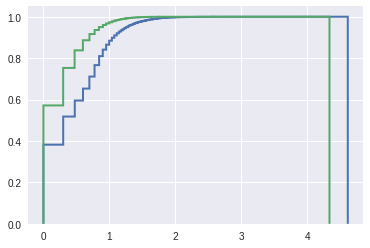

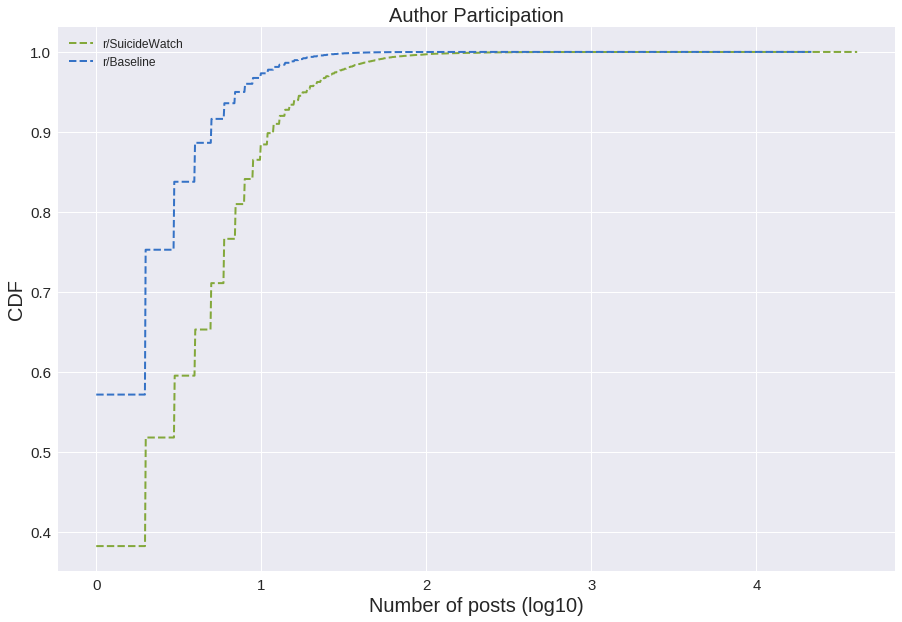

In [36]:
n1 , bins1 , patches1 = plt.hist(np.log10(authCount_SW.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authCount_BL.values()), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Author Participation", fontsize = 20)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch' , 'r/Baseline'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [37]:
# sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

# top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

# top1percent_SW_auths = [k[0] for k in top1percent_SW]

# print len(top1percent_SW_auths) , len(SW_mods)
# print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

In [38]:
# top1percent_SW[-2]

In [39]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

3587 2


In [40]:
top1percent_BL[-2]

(u'WikiTextBot', 349)

In [41]:
sampled_BL[sampled_BL.keys()[19]].nodes(data=True)

[(u't1_dv2sitr',
  {'affects': 25.77,
   'author': u'Shiny_arr0wz',
   'depth': 0,
   'downs': 0,
   'text': 'l00000000l',
   'time': 1520008555.0,
   'ups': 2}),
 (u't1_dv302d0',
  {'affects': 1.0,
   'author': u'Someone9339',
   'depth': 0,
   'downs': 0,
   'text': ' #stealhislook',
   'time': 1520015525.0,
   'ups': 4}),
 (u't1_dv2zrk8',
  {'affects': 1.0,
   'author': u'Hsky12',
   'depth': 2,
   'downs': 0,
   'text': 'Yeah I was worried there for a second. 750kcal drink is insane ',
   'time': 1520015248.0,
   'ups': 3}),
 (u't1_dv3d2rn',
  {'affects': 99.0,
   'author': u'Drox01',
   'depth': 3,
   'downs': 0,
   'text': '&gt; s Yeah oh well',
   'time': 1520028018.0,
   'ups': 1}),
 (u't1_dv3epb4',
  {'affects': 25.77,
   'author': u'Tuss1n',
   'depth': 2,
   'downs': 0,
   'text': 'Is said BLACK. Not black ',
   'time': 1520029739.0,
   'ups': -3}),
 (u't1_dv3jhpi',
  {'affects': 99.0,
   'author': u'Fercopp',
   'depth': 4,
   'downs': 0,
   'text': 'Oh well in my country t

In [42]:
# drawReplyGraph(sampled_SW[sampled_SW.keys()[151]])

In [43]:
# drawReplyGraph(sampled_BL[sampled_BL.keys()[151]])

In [44]:
userGraphs_SW = createUserGraphs(sampled_SW)

In [45]:
userGraphs_BL = createUserGraphs(sampled_BL)

In [46]:
len(userGraphs_BL), len(userGraphs_SW)

(11437, 11437)

In [47]:
def getSortedSizeDict(graphs):
    size = dict()
    for k in graphs:
        size[k] = len(graphs[k].nodes())
    sortedSizes = sorted(size.items(),key=operator.itemgetter(1))
    return sortedSizes

def getSampledResponses(replyGraphs , keys):
    responses = {}
    for k in keys:
        responses[k] = {}
        responses[k]['-1'] = tuple()
        responses[k]['0']  = []
        for n in replyGraphs[k].nodes(data=True):
            if n[1]['depth'] == -1:
                responses[k]['-1'] = n
            if n[1]['depth'] == 0:
                if n[1]['text'] != '[removed]':
                    if len(n[1]['text']) > 20:
                        responses[k]['0'].append(n)
    return responses
            
            
        

In [48]:
sortedReplyGraphs = getSortedSizeDict(sampled_SW)

In [49]:
sorted_responses= getSampledResponses(sampled_SW,[k[0] for k in sortedReplyGraphs[7000:7020]])

In [50]:
# fieldnames = ['postId', 'postDepth','author','text']
# with open("RinaSampleV2.csv", 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in sorted_responses:
#         root_resp = sorted_responses[k]['-1'][1]
#         dict_writer.writerow({'postId': k , 'postDepth': 'root' , 'author': root_resp['author'] , 'text' : root_resp['text']})
#         for r in sorted_responses[k]['0']:
#             dict_writer.writerow({'postId': k , 'postDepth': 'first_response' , 'author': r[1]['author'] , 'text' : r[1]['text']})


In [51]:
# g = (allGraphs_SW[sortedReplyGraphs[-1][0]])
# for n in g.nodes(data=True):
#      if n[1]['depth'] == 0:
#          print n

In [52]:
# drawReplyGraph(sampled_SW[sortedReplyGraphs[-1][0]])

22


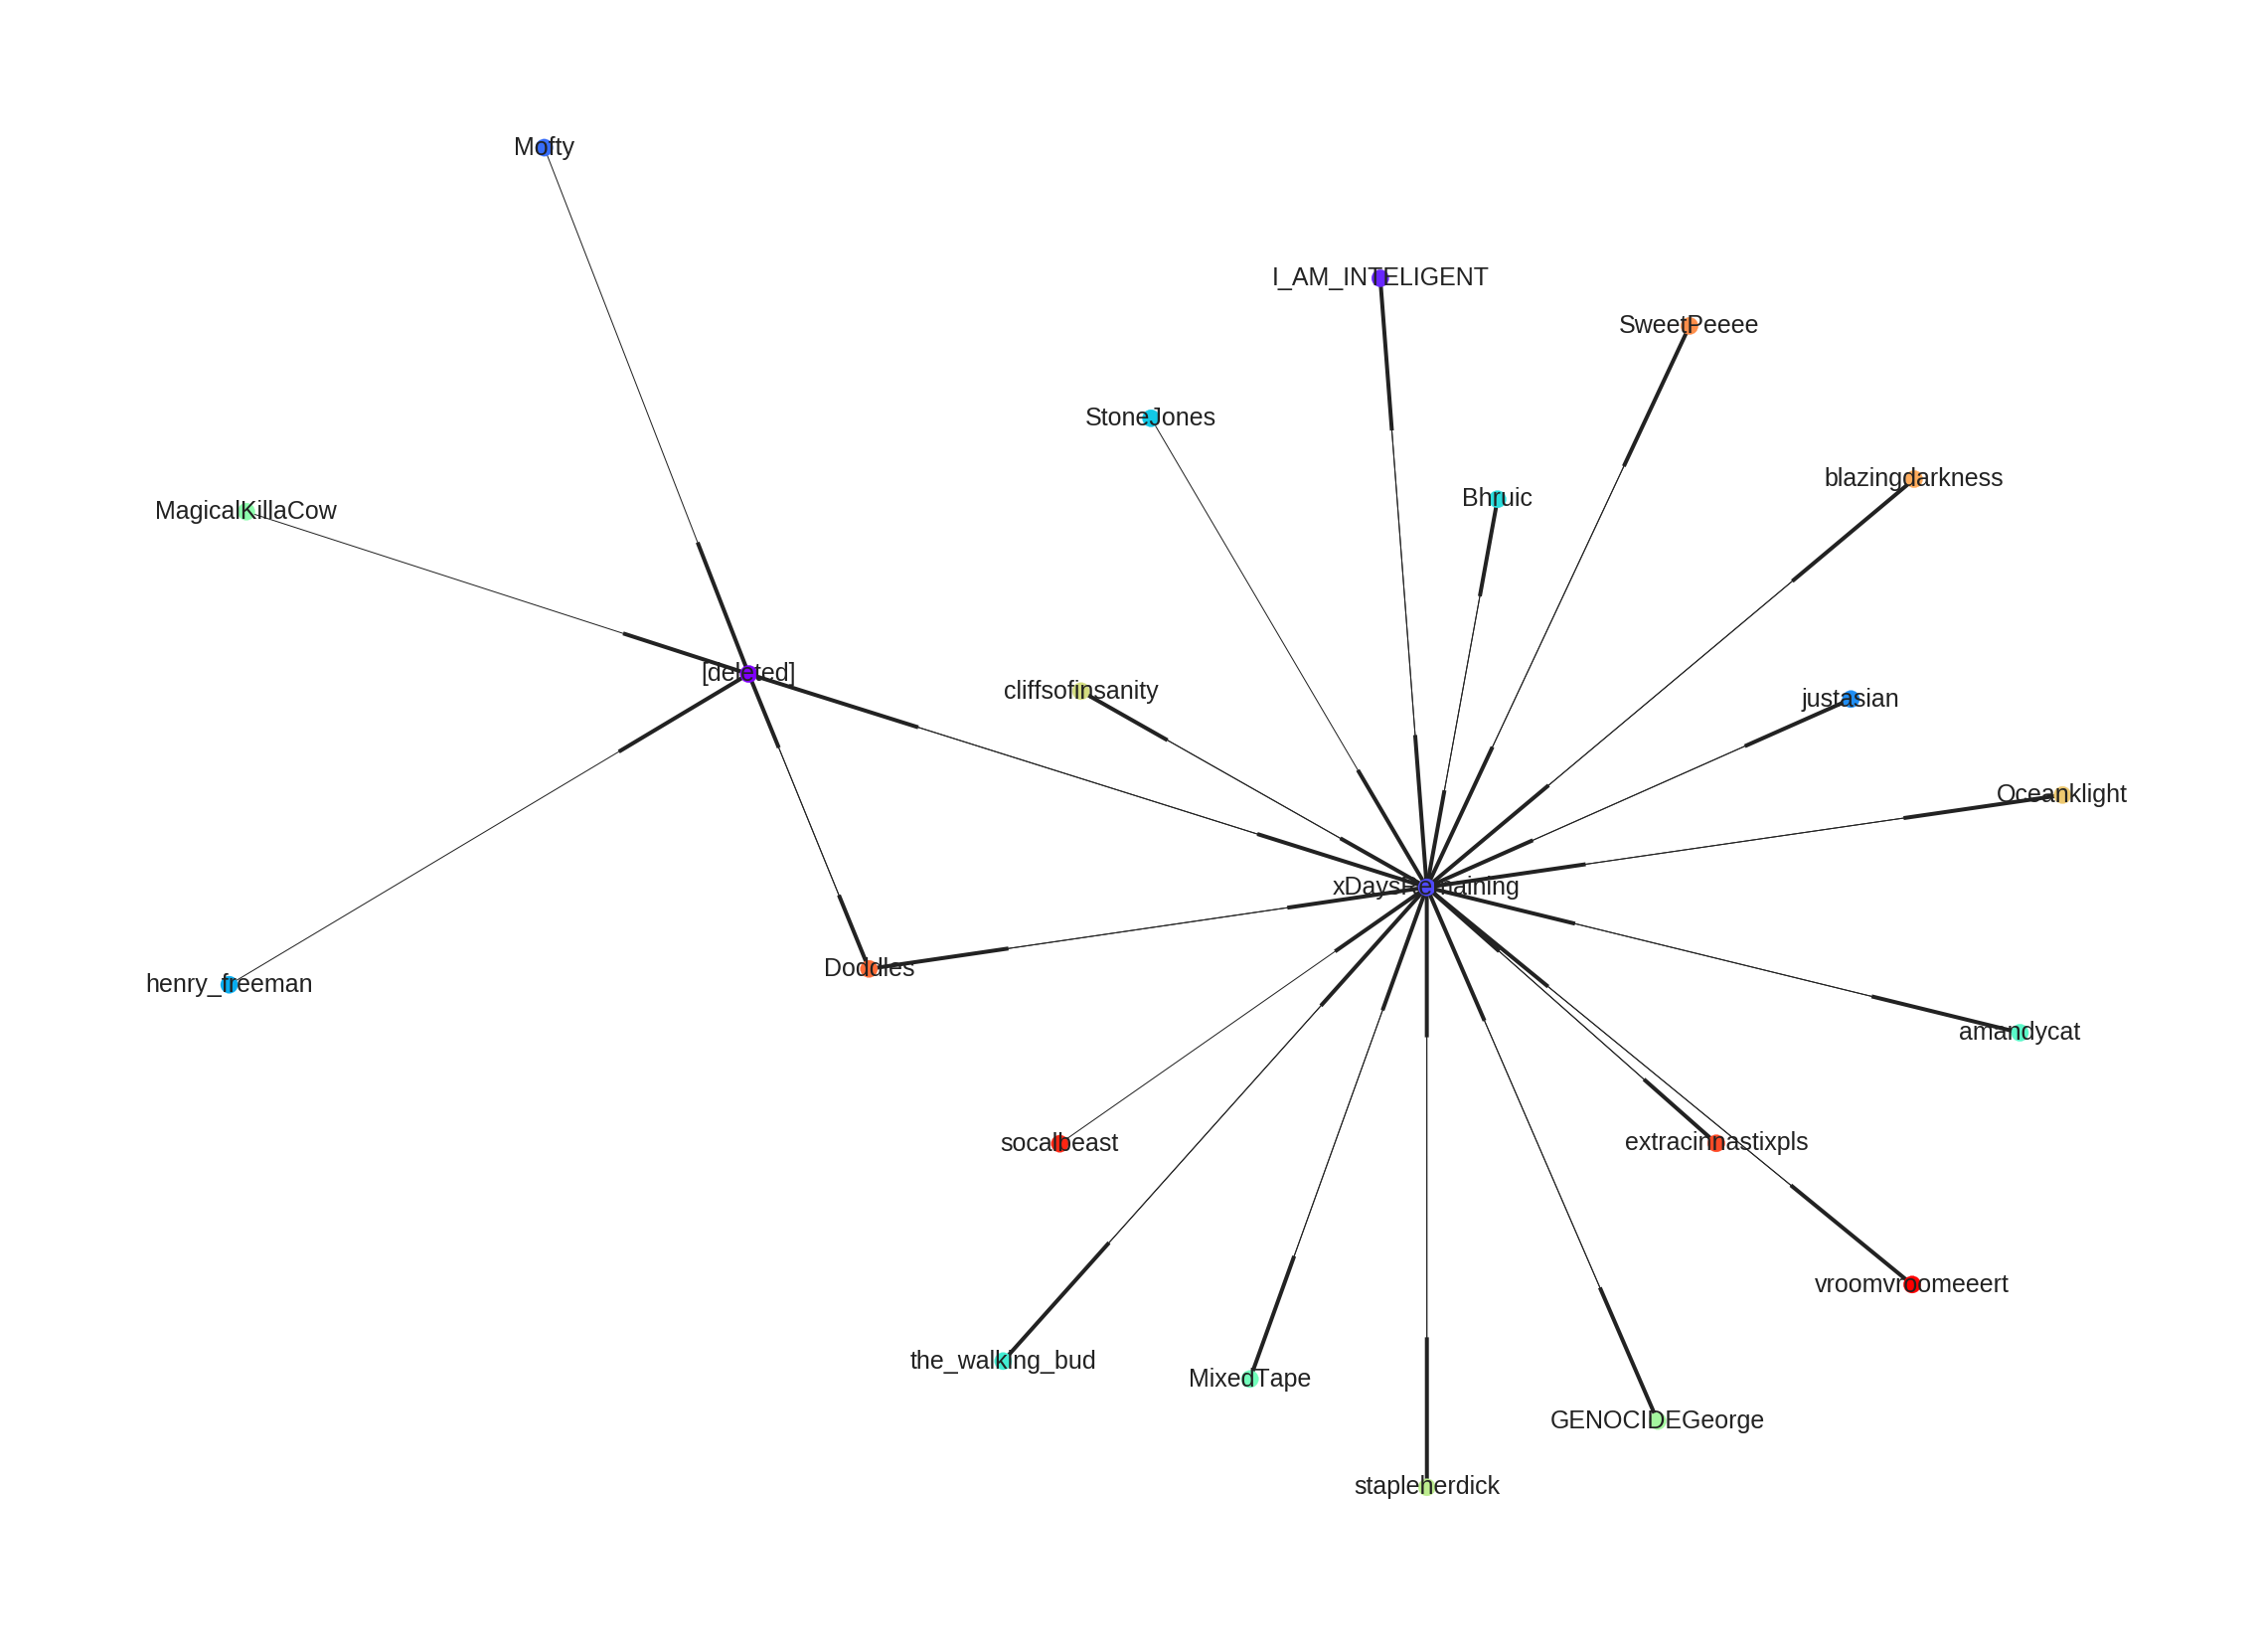

In [53]:
drawUserGraph(userGraphs_SW[sortedReplyGraphs[-1][0]])

In [54]:
# Save sampled Reply Graphs: 
# with open("../Data/SW_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_SW)

In [55]:
# with open("../Data/BL_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=allGraphs_SW)

In [56]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/SW_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

In [57]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/FP_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_BL)

33


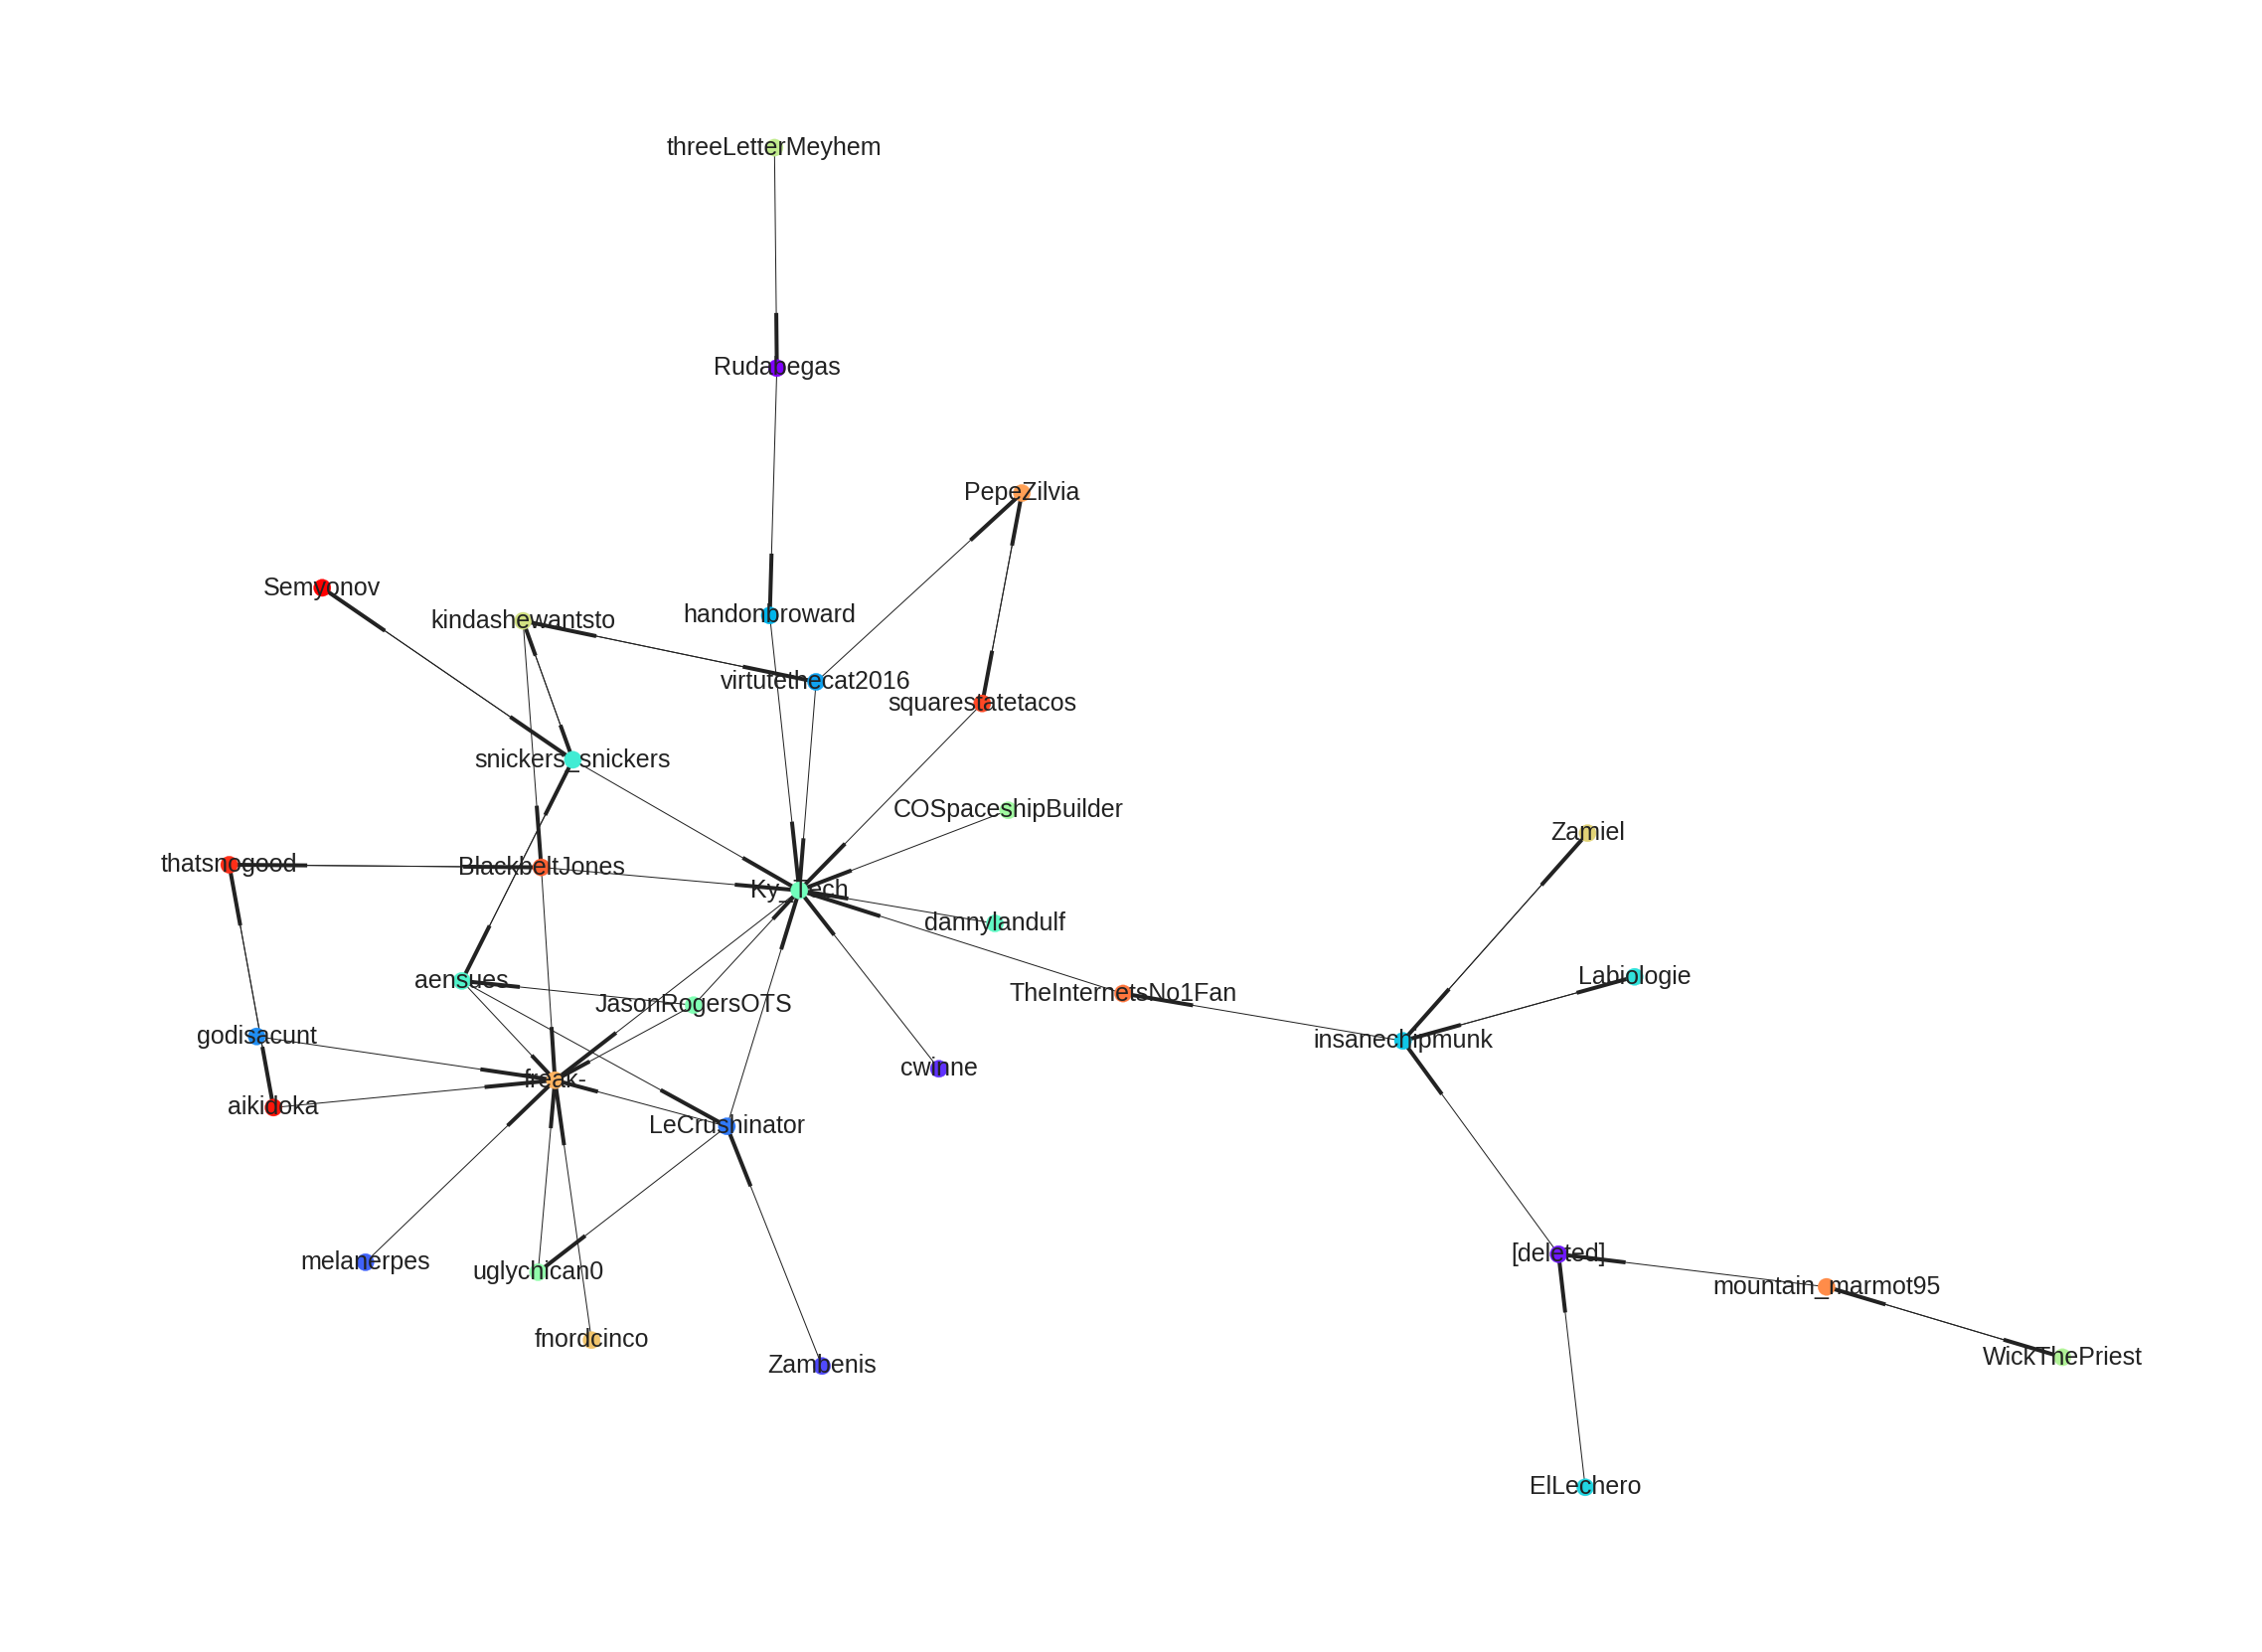

In [58]:
drawUserGraph(userGraphs_BL[sampled_BL.keys()[160]])

In [59]:
# drawUserGraph(userGraphs_SW[sampled_SW.keys()[160]])

In [60]:
# drawUserGraph(userGraphs_BL[allGraphs_BL.keys()[1]])

In [61]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [62]:
opAuthors_SW = getRootauthors(sampled_SW)
opAuthors_BL = getRootauthors(sampled_BL)

In [63]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [64]:
# with open("BL_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_BL)

In [65]:
# with open("SW_opAuthors_sampled.pkl",'w') as f:
#     pkl.dump(file=f,obj=opAuthors_SW)

In [66]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)

11437 11437
11437 11437


In [67]:
# %store -r filteredUGraphs_BL

In [68]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW)

11070 10527


In [69]:
filteredReply_SW = {}
for k in filteredUGraphs_SW:
    filteredReply_SW[k] = sampled_SW[k]
    
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = sampled_BL[k]

In [70]:
len(filteredReply_SW) , len(filteredReply_BL)

(10527, 11070)

In [71]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampledUgraphs_SW)
    

# with open("../Data/AS_Sampled_ugraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [72]:
# with(open("SW_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_SW,f)

# with(open("BL_OpAuthors_2.pkl",'wb')) as f:
#     pkl.dump(opAuthors_BL,f)

In [73]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k] for k in depth]
    return depths
        

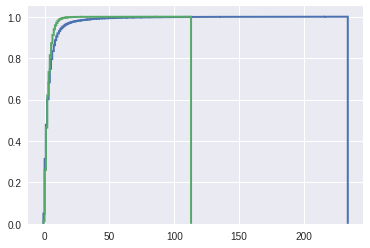

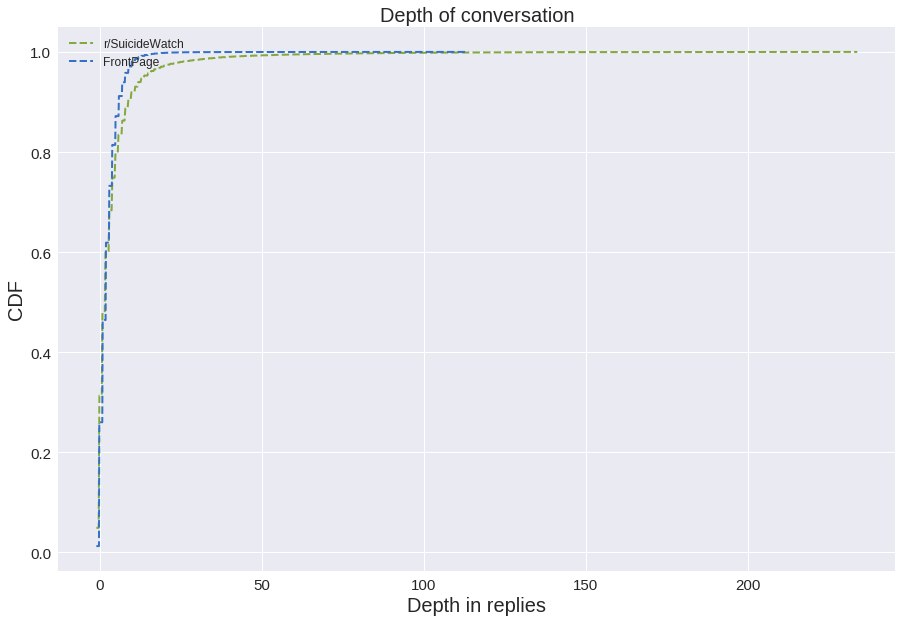

In [74]:
n1 , bins1 , patches1 = plt.hist(getDepths(filteredReply_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(getDepths(filteredReply_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)
plt.title("Depth of conversation", fontsize = 20)
plt.xlabel("Depth in replies",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [75]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [76]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(filteredReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_SW))
print stats/normstats, pvalue

869181 214229
Samples are same size, no need to resample
0.8547685336397116 0.0


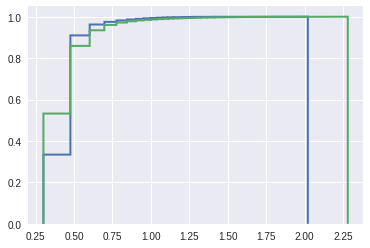

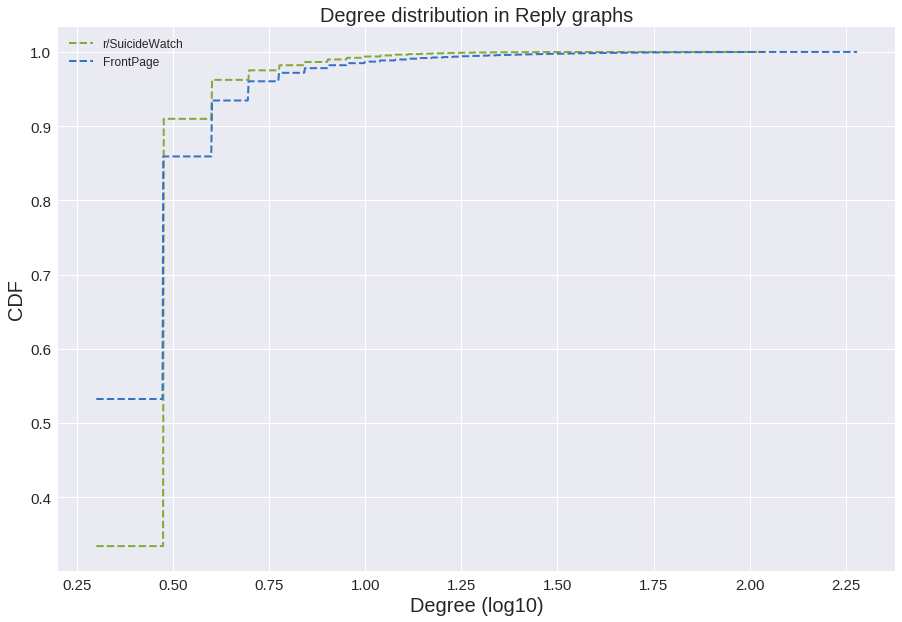

In [77]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in Reply graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','FrontPage'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

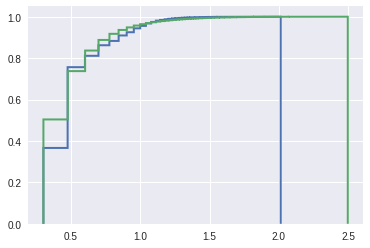

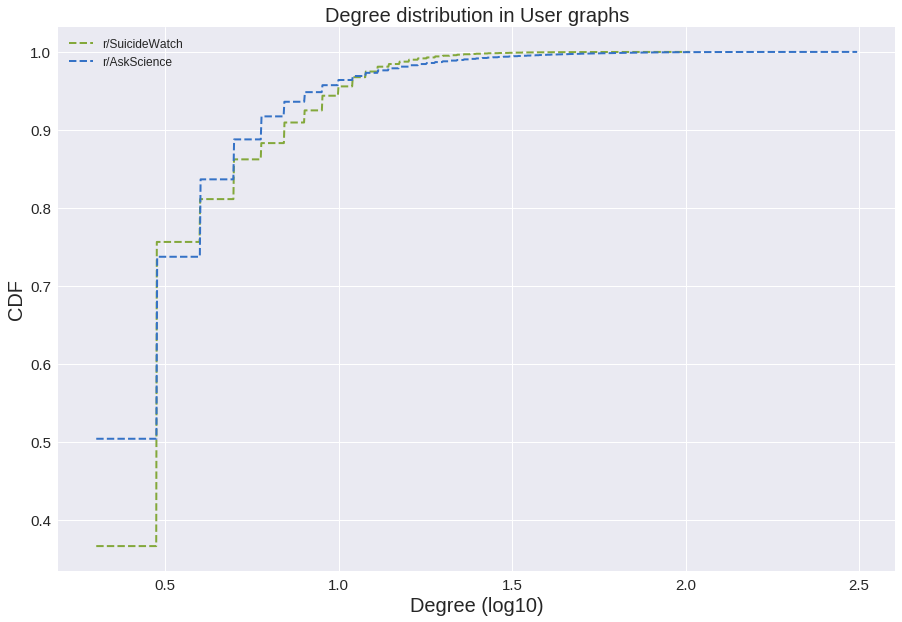

In [78]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g--', linewidth=2)
ax.plot(bins2[:-1], n2, 'b--', linewidth=2)

plt.title("Degree distribution in User graphs", fontsize = 20)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/SuicideWatch','r/AskScience'], loc='upper left' , fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [79]:
print len(getDegreeDist(filteredUGraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredUGraphs_SW))
print stats/normstats, pvalue

68961 557200
1890854338.5 0.0
Samples are same size, no need to resample
0.7952084182303952 0.0


In [80]:


def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
#                         print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if n not in authors:
                print "author not found" + n
                continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [81]:
# allGraphs_SW[allGraphs_SW.keys()[100]].edges()

In [82]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [83]:
convChainsSW = getSymmetricOPResponses(sampled_SW, opAuthors_SW)

Edge authors not found


In [84]:
# print convChainsSW

In [85]:
times = nx.get_node_attributes(filteredReply_SW[filteredReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1390035754.0


In [86]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [87]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_SW,opAuthors_SW)

author not foundt3_g5rqg


In [88]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [89]:
len(SW_OPSentiDiff)

9860

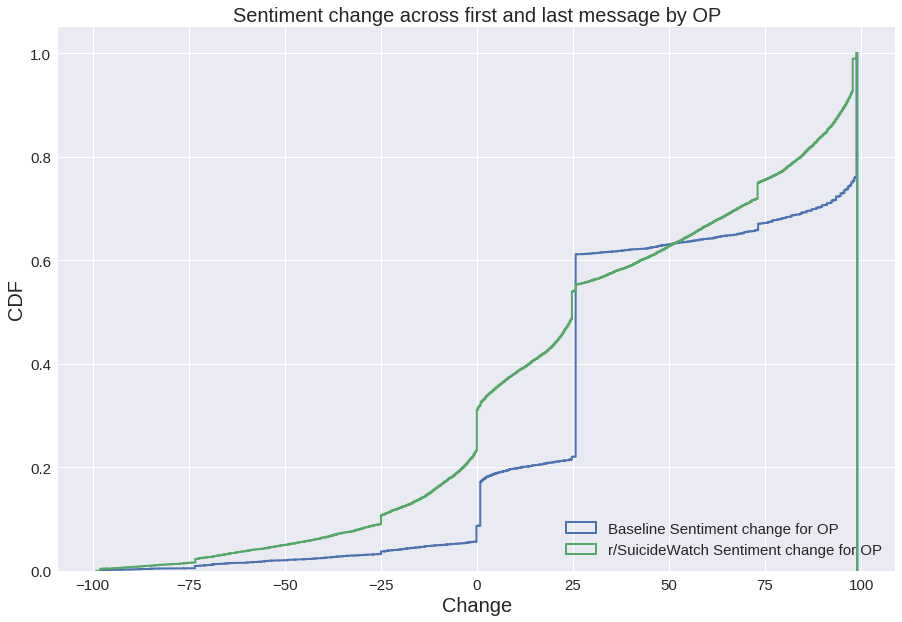

In [90]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n1 , bins1 , patches1 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [91]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

7058 9860
18544798.5 4.1838641998791215e-154
Samples are same size, no need to resample
0.7445413226329131 4.1838641998791215e-154


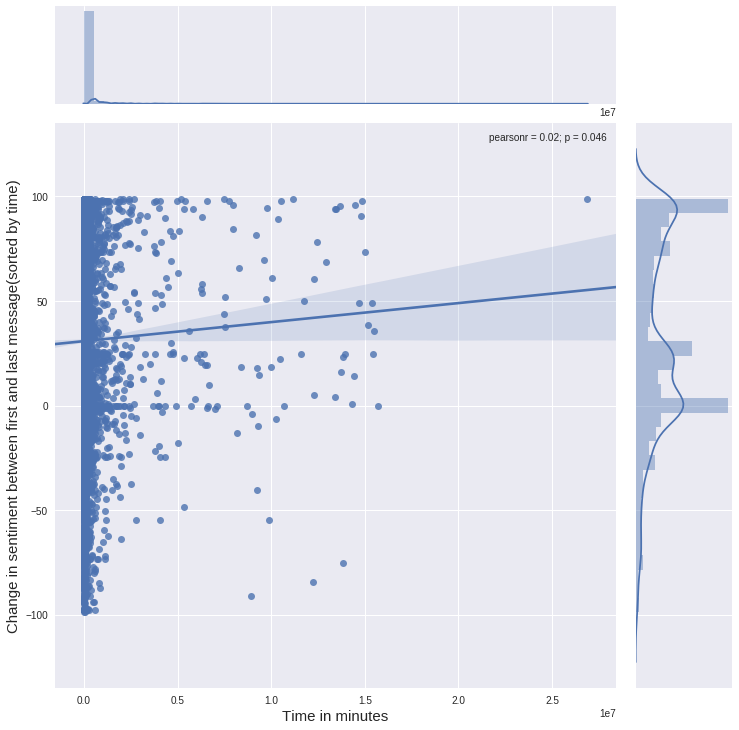

In [92]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [93]:
SW_timeDist = getTimeDistribution(filteredReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)

Author not found


In [94]:
SW_AllTimeDist = getAllTimeDifferences(filteredReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)

 Time not found


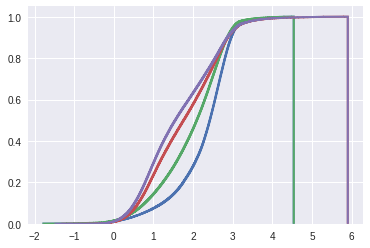

In [95]:
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n4 , bins4 , patches4 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


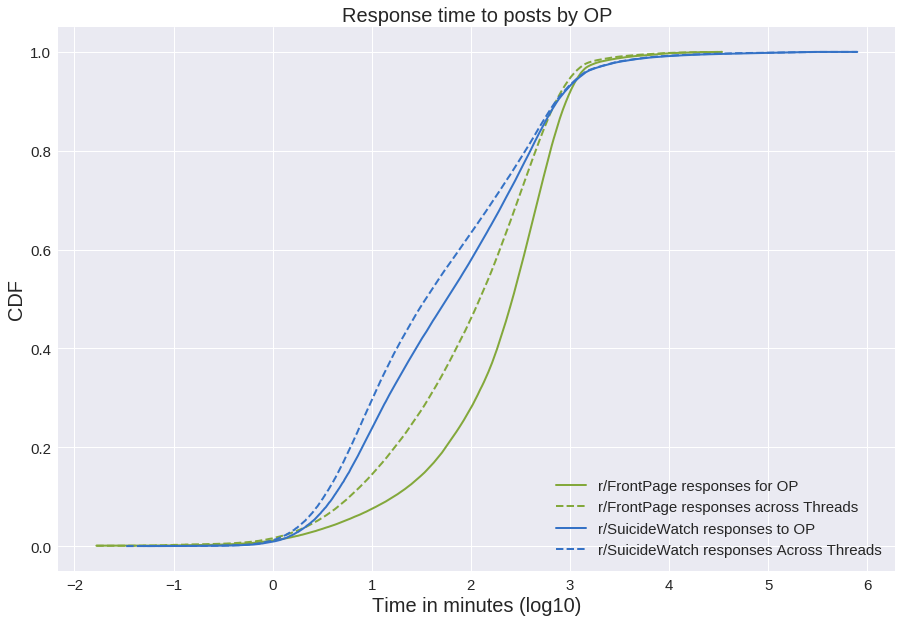

In [96]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'g--', linewidth=2)
ax.plot(bins3[:-1], n3, 'b', linewidth=2)
ax.plot(bins4[:-1], n4, 'b--', linewidth=2)

plt.title("Response time to posts by OP", fontsize = 20)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['r/FrontPage responses for OP', 'r/FrontPage responses across Threads' , 'r/SuicideWatch responses to OP' , 'r/SuicideWatch responses Across Threads'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [97]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)


In [98]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [99]:
SW_messageParti_all , SW_userParti_all, SW_bpusers_all = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [100]:
len(SW_bpusers_all)

10527

In [101]:
max(SW_messageParti)

0.6153846153846154

In [102]:
# BPusers['26i7k4']

In [103]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

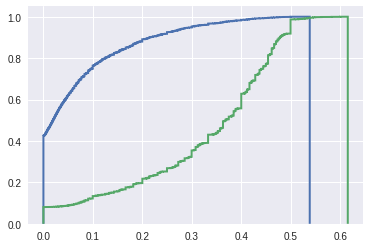

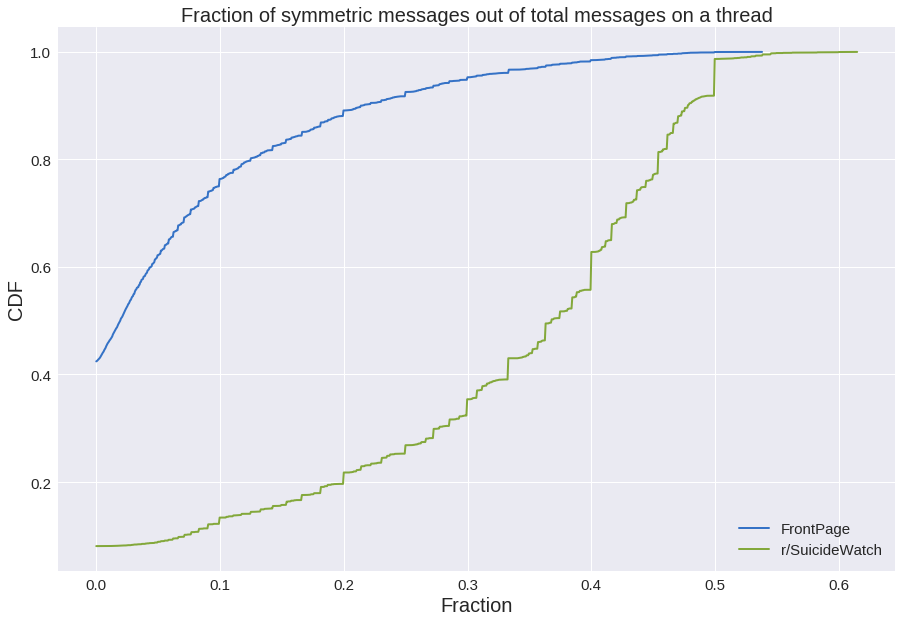

In [104]:
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction of symmetric messages out of total messages on a thread", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [105]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.019801980198019802 0.0682055934622126
0.3684210526315789 0.32513117750158615


In [106]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

11070 10527
12336263.5 0.0
Samples are same size, no need to resample
0.2013345883835231 0.0


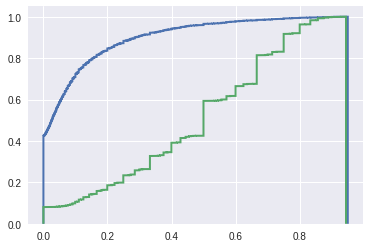

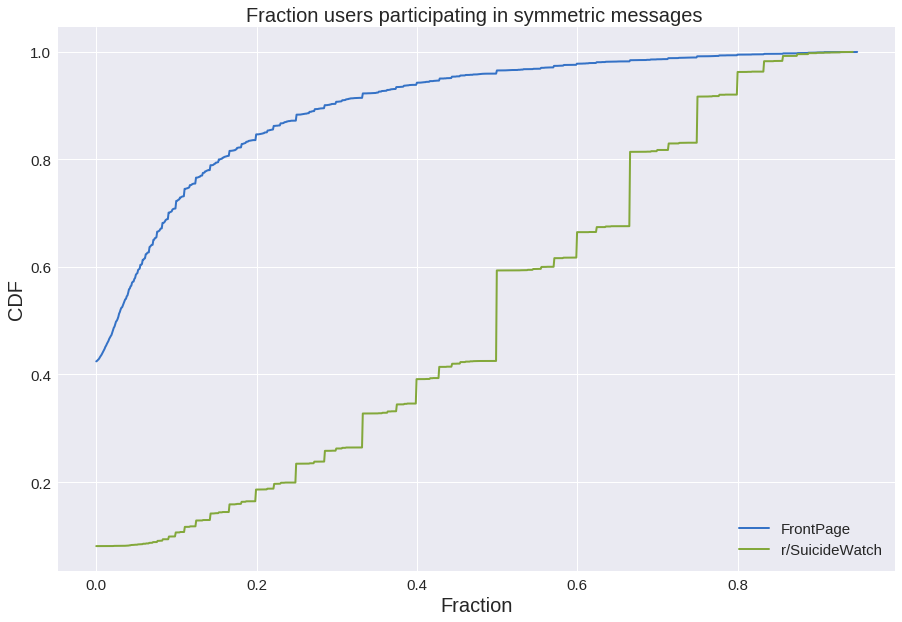

In [107]:
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'b', linewidth=2)
ax.plot(bins2[:-1], n2, 'g', linewidth=2)

plt.title("Fraction users participating in symmetric messages ", fontsize = 20)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [108]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)

0.026607669616519176 0.09440856127613712
0.5 0.4658514824184498


In [109]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

11070 10527
13257000.5 0.0
Samples are same size, no need to resample
0.21636152136890233 0.0


In [110]:
len(opAuthors_SW) , len(SW_bpusers)

(11437, 10527)

In [111]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(0,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            print len(MeanAffects)
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [112]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(filteredReply_SW,SW_bpusers,opAuthors_SW)


In [113]:
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,50)


In [114]:
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,50)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

50 50 50 50


In [115]:
len(SW_bpUserEmoDict[0])

29133

In [116]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,50)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,50)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

24
26
28
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
44
46
48
50 50 50 50


In [117]:
# sns.distplot(rootEmoDict[7])

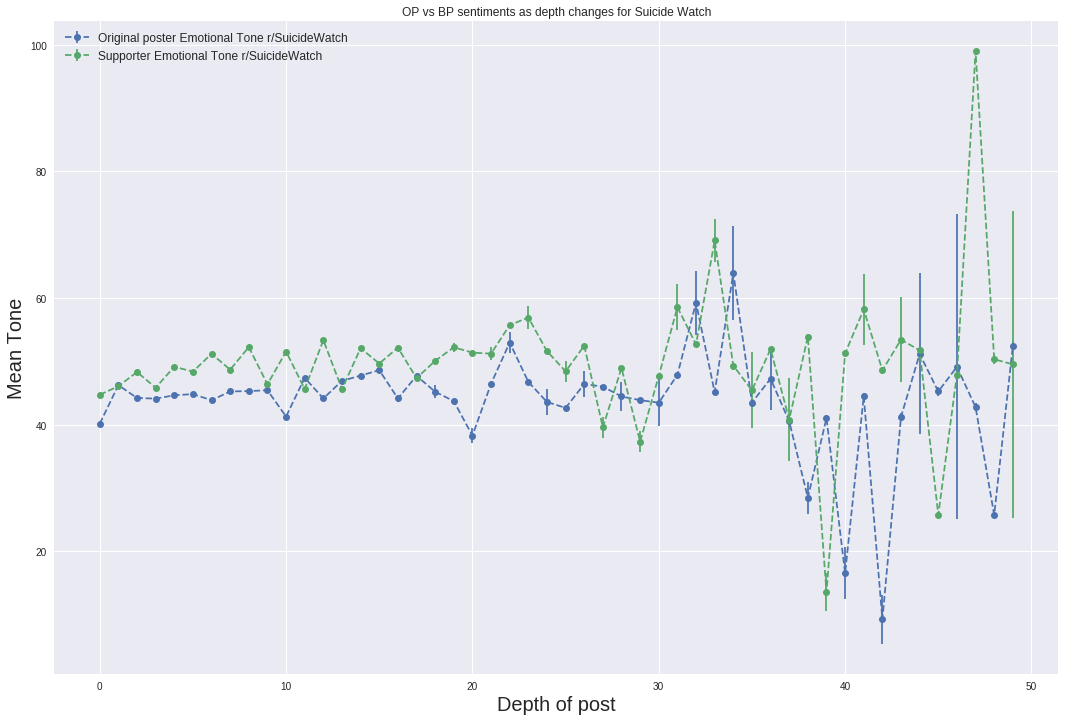

In [118]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

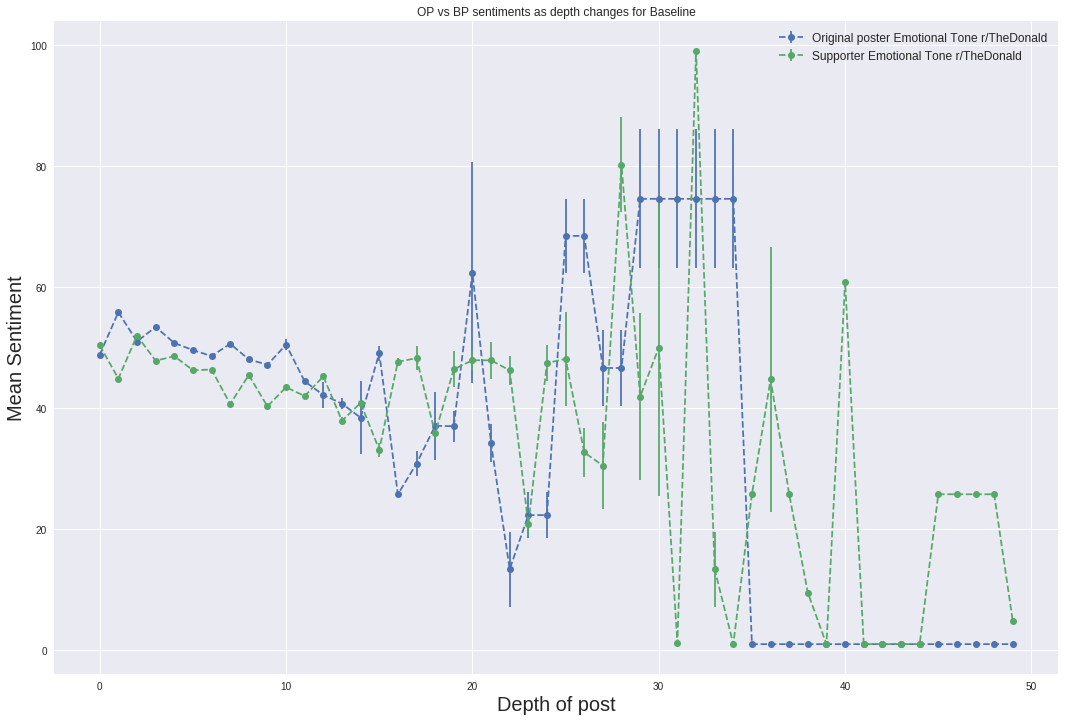

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/TheDonald' , 'Supporter Emotional Tone r/TheDonald'], fontsize=12)

In [120]:
triangleDist_SW = [sum(list(nx.triangles(filteredUGraphs_SW[k].to_undirected()).values()))/3 for k in filteredUGraphs_SW]
triangleDist_BL = [sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 for k in filteredUGraphs_BL]

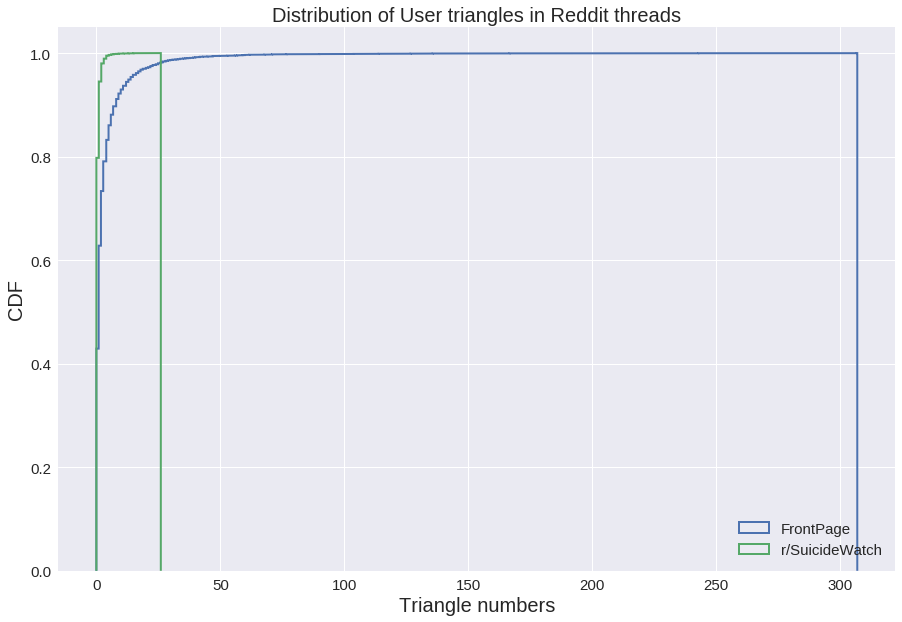

In [121]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [122]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

11070 10527
32028778.0 0.0
Samples are same size, no need to resample
0.5227272289585286 0.0


In [123]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [124]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [125]:
# len(SW_Posts)

In [126]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals

In [127]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacy(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics
        
def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [128]:
# len(opAuthors_SW), len(allGraphs_SW)

In [129]:
# SW_bpusers_all

In [130]:
print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

10527


In [131]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers_all:
    for u in SW_bpusers_all[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [132]:
del Multiple_BP['[deleted]']

In [133]:
len(Multiple_BP)

2879

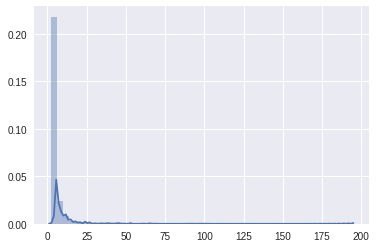

In [134]:
sns.distplot(Multiple_BP.values())

In [135]:
SW_multbpUsers = {}
for k in SW_bpusers_all:
    SW_multbpUsers[k] = []
    for m in SW_bpusers_all[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [136]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [137]:
len(SW_bpusers)

10527

In [138]:
SW_IR_posts = getIRTexts(filteredReply_SW,opAuthors_SW,SW_bpusers)

In [139]:
SW_Texts = getAllText(filteredReply_SW)

{}


In [140]:
BL_Texts = getAllText(filteredReply_BL)

In [141]:
len(filteredReply_BL),len(filteredReply_SW)

(11070, 10527)

In [142]:
len(SW_Texts),len(BL_Texts)

(206009, 859455)

In [143]:
SW_IR_posts[:4]

[u"Hey man....im glad you sound like you've found peace....but I'm sad that it had to be because of this and on these terms. there's always something to live for....you just have to really search sometimes. Im here if you'd like to chat. Hang in there man. :/ ",
 u'Sometimes you have to live first.....the death part comes later.http://www.youtube.com/watch?v=7_5A8Q_Tzc4',
 u'Yes but not 100\u2105 guaranteed to work',
 u"Damn bro, you definitely hit a few chords with me there.  I know that feeling of being down again and feeling like you have to start from scratch.  And I know that financial situation can make things seem hopeless.  What has always helped me was thinking of my nephew.  You need to stop telling yourself that your son is better off without you.  He won't.  Having a father that loves him and shows him is far more important than anything else.  As he gets older, he'll appreciate you even more that you survived this and made it through....and you will make it through.Think a

In [144]:
opAuthors_SW['pfn0u']

u'Heroic_Dose'

In [145]:
SW_OP_posts = getOPTexts(filteredReply_SW,opAuthors_SW)


In [146]:
len(SW_OP_posts)

82027

In [147]:
# SW_OP_posts[:10]

In [148]:
SW_BP_posts = getBPTexts(filteredReply_SW, SW_bpusers)

In [149]:
SW_MultBP_posts = getBPTexts(filteredReply_SW,SW_multbpUsers)

In [150]:
len(SW_MultBP_posts)

41191

In [151]:
len(SW_BP_posts)

83116

In [152]:
# SW_BP_posts[:10]

In [153]:
# sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [154]:
len(SW_OP_posts) , len(SW_BP_posts)

(82027, 83116)

In [155]:
# OP_tokenized = tokenizeTexts(SW_OP_posts)
# BP_tokenized = tokenizeTexts(SW_BP_posts)
# IR_tokenized = tokenizeTexts(SW_IR_posts)

In [156]:
All_cleaned = tokenizeTextsSpacy(SW_Texts)

In [157]:
BL_cleaned = tokenizeTextsSpacy(BL_Texts)

In [158]:
# MultBP_tokenized = tokenizeTexts(SW_MultBP_posts)

In [159]:
len(All_cleaned) , len(BL_cleaned)

(206009, 859455)

In [160]:
# len(OP_tokenized) , len(BP_tokenized)

In [161]:
# OP_tokenized[1]

In [162]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

In [163]:
dictionary_BL = gensim.corpora.Dictionary(BL_cleaned)

In [164]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary) , len(dictionary_BL)

(176804, 520089)

In [165]:
# len(dictionary_OP) , len(dictionary_BP)

In [166]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [167]:
All_SWcorpus = [dictionary.doc2bow(text) for text in All_cleaned]

In [168]:
All_BLcorpus = [dictionary_BL.doc2bow(text) for text in BL_cleaned]

In [169]:
# MultBP_corpus = [dictionary.doc2bow(text) for text in MultBP_tokenized]

# BP_tokenized[3]

# len(corpus_BP) , len(corpus_IR)

# len(corpus_BP)

# type(corpus_OP)

In [170]:
len(All_SWcorpus) , len(All_BLcorpus)

(206009, 859455)

In [171]:
sampled_corpus_SW = random.sample(All_SWcorpus,10000)
sampled_corpus_BL = random.sample(All_BLcorpus,10000)

In [172]:
ldamodel = LdaMulticore(All_SWcorpus, id2word=dictionary, num_topics=80,workers=5) 
# ldamodel = gensim.models.ldamodel.LdaModel(sampled_corpus_SW, id2word=dictionary, num_topics=40) 

In [174]:
ldamodel_BL = LdaMulticore(All_BLcorpus, id2word=dictionary_BL, num_topics=50,workers=5) 
# ldamodel_BL = gensim.models.ldamodel.LdaModel(sampled_corpus_BL, id2word=dictionary_BL, num_topics=100) 

In [175]:
# generate LDA model
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, num_topics=100, id2word = dictionary_OP, passes=20)
# ldamodel_OP = gensim.models.ldamodel.LdaModel(corpus_OP, id2word=dictionary, num_topics=50) 

# ldamodel_IR = gensim.models.ldamodel.LdaModel(corpus_IR, id2word=dictionary, num_topics=20) 



# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, num_topics=100, id2word = dictionary_BP, passes=20)
# ldamodel_BP = gensim.models.ldamodel.LdaModel(corpus_BP, id2word=dictionary, num_topics=10) 

# ldamodel[All_corpus[11]]

# ldamodel_MultBP = gensim.models.ldamodel.LdaModel(MultBP_corpus, id2word=dictionary, num_topics=10) 

In [176]:
# ldamodel = gensim.models.ldamodel.LdaModel.load("SW_allcorpus_model_v3_new")
# ldamodel_BL = gensim.models.ldamodel.LdaModel.load("BL_allcorpus_model_v3_new")

In [177]:
pyLDAvis.enable_notebook()
topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus_SW,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [178]:
pyLDAvis.display(topic_display)

In [179]:
pyLDAvis.enable_notebook()
topic_display_BL = pyLDAvis.gensim.prepare(topic_model=ldamodel_BL,corpus=sampled_corpus_BL,dictionary=dictionary_BL)

In [180]:
pyLDAvis.display(topic_display_BL)

In [181]:
# ldamodel.save("TopicModels/SW_allcorpus_model_v5")

In [182]:
# ldamodel_BL.save("TopicModels/BL_allcorpus_model_v5")

In [183]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [184]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [185]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [186]:
# ldamodel_IR.print_topics(10)

In [187]:
dictionary.values().index('harm')

161347

In [188]:
# ldamodel.save("SW_Alltext.mdl")

In [189]:
topics1 = getTextTopicsSpacy("hello there this is the captain speaking, we are about to crash land. Brace for impact",ldamodel)
topics2 = getTextTopicsSpacy("The quick brown fox jumped over the lazy fence",ldamodel)
topics3 = getTextTopicsSpacy("Hello everyone, we are not going to crash land. This is the captain", ldamodel)

In [190]:
print topics1, topics2 , topics3

[(2, 0.38445926), (3, 0.117227025), (24, 0.203042), (57, 0.17652167)] [(13, 0.18682626), (16, 0.3838084), (22, 0.15587224), (69, 0.1377788)] [(3, 0.20330945), (57, 0.63419056)]


In [191]:
a = np.zeros(40)
a[10] = 100
print a

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [192]:
from scipy import spatial
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

def findEuclideanTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001-spatial.distance.euclidean(topicidx1,topicidx2)

def findCosineTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001 - spatial.distance.cosine(topicidx1,topicidx2)

In [193]:
print findEuclideanTopicsMetric(topics1 , topics2,topicDimension=80) , findEuclideanTopicsMetric(topics2,topics3,topicDimension=80) , findEuclideanTopicsMetric(topics1,topics3, topicDimension=80),

0.322287970399 0.182160825614 0.362992500081


In [194]:
print findCosineTopicsMetric(topics1 , topics2,topicDimension=80) , findCosineTopicsMetric(topics2,topics3,topicDimension=80) , findCosineTopicsMetric(topics1,topics3, topicDimension=80),

9.999999999998899e-05 9.999999999998899e-05 0.42163068351561983


In [200]:
import time 

def createTopicalUserGraph(srcDestWeightList):
    userGraph = nx.DiGraph()
    for k in srcDestWeightList:
        src = k[0]
        dst = k[1]
        jaccard = k[2]
        
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=jaccard )
        else:
            origWeight = userGraph[src][dst]['weight']
            update = float((origWeight + jaccard))/2.0
            userGraph[src][dst]['weight'] = update
    return userGraph
        
    
def createTopicGraphs(replyGraphs,ldaModel, topicDimensions, deletedUsers=None,logfile=None):
    topicGraphs = {}
    index = 0
    total = len(replyGraphs)
    for i in replyGraphs:
        index+=1
        start_t = time.time()
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        srcDestWeightList = []
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopicsSpacy(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopicsSpacy(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findEuclideanTopicsMetric(topicSrc, topicDest,topicDimension=topicDimensions)
            else:
                jaccard = 0.00001
            replyGraphs[i][e[0]][e[1]]['weight'] = jaccard
            srcDestWeightList.append((src,dst,jaccard))
        topicGraphs[i] = createTopicalUserGraph(srcDestWeightList)#userGraph
        end_t = time.time()
        print "executed graph in %f seconds"%(end_t-start_t)
        logging.debug("createTopicGraphs::executed %d th graph in %f seconds, total graph %d",index,float(end_t-start_t),total) 
    return topicGraphs
    

In [196]:
def sampleGraphs(graphDict , samples):
    sampledKeys = random.sample(graphDict.keys(), samples)
    sampledGraphDict = {}
    for k in sampledKeys:
        sampledGraphDict[k] = graphDict[k]
    return sampledGraphDict

In [201]:
sampled_Filtered_SW = sampleGraphs(filteredReply_SW,1000)

In [ ]:
topicUserGraphs = createTopicGraphs(filteredReply_SW,ldamodel,topicDimensions=80)

executed graph in 2.033017 seconds
executed graph in 1.264940 seconds
executed graph in 3.339097 seconds
executed graph in 1.904962 seconds
executed graph in 2.157061 seconds
executed graph in 1.412028 seconds
executed graph in 1.417990 seconds
executed graph in 2.013234 seconds
executed graph in 1.279075 seconds
executed graph in 1.608651 seconds
executed graph in 1.116782 seconds
executed graph in 1.069465 seconds
executed graph in 1.609441 seconds
executed graph in 6.832104 seconds
executed graph in 3.347794 seconds
executed graph in 1.708265 seconds
executed graph in 1.278825 seconds
executed graph in 1.744815 seconds
executed graph in 1.207234 seconds
executed graph in 1.987551 seconds
executed graph in 1.308856 seconds
executed graph in 1.640114 seconds
executed graph in 1.201701 seconds
executed graph in 1.840718 seconds
executed graph in 2.575401 seconds
executed graph in 3.755305 seconds
executed graph in 2.449362 seconds
executed graph in 1.078197 seconds
executed graph in 4.

executed graph in 2.043765 seconds
executed graph in 3.072373 seconds
executed graph in 1.312367 seconds
executed graph in 1.268617 seconds
executed graph in 2.874378 seconds
executed graph in 4.670014 seconds
executed graph in 1.848614 seconds
executed graph in 2.170130 seconds
executed graph in 1.451645 seconds
executed graph in 2.619935 seconds
executed graph in 1.478405 seconds
executed graph in 2.357331 seconds
executed graph in 2.355699 seconds
executed graph in 5.200604 seconds
executed graph in 1.470247 seconds
executed graph in 2.774569 seconds
executed graph in 3.475546 seconds
executed graph in 2.345441 seconds
executed graph in 5.155664 seconds
executed graph in 1.231307 seconds
executed graph in 1.955401 seconds
executed graph in 0.972047 seconds
executed graph in 1.360777 seconds
executed graph in 1.104922 seconds
executed graph in 2.203727 seconds
executed graph in 1.574153 seconds
executed graph in 1.398682 seconds
executed graph in 3.778942 seconds
executed graph in 1.

executed graph in 4.703775 seconds
executed graph in 1.767739 seconds
executed graph in 2.404921 seconds
executed graph in 1.646861 seconds
executed graph in 1.297899 seconds
executed graph in 3.132031 seconds
executed graph in 2.176858 seconds
executed graph in 1.617248 seconds
executed graph in 1.446512 seconds
executed graph in 1.723450 seconds
executed graph in 1.388230 seconds
executed graph in 2.006574 seconds
executed graph in 2.920308 seconds
executed graph in 2.046810 seconds
executed graph in 1.314870 seconds
executed graph in 1.736394 seconds
executed graph in 3.150646 seconds
executed graph in 2.580944 seconds
executed graph in 2.204358 seconds
executed graph in 1.450632 seconds
executed graph in 1.514637 seconds
executed graph in 1.879418 seconds
executed graph in 2.830542 seconds
executed graph in 1.955258 seconds
executed graph in 3.026373 seconds
executed graph in 3.994031 seconds
executed graph in 4.632111 seconds
executed graph in 1.148194 seconds
executed graph in 1.

executed graph in 1.974972 seconds
executed graph in 1.135421 seconds
executed graph in 1.523979 seconds
executed graph in 1.098542 seconds
executed graph in 2.118178 seconds
executed graph in 4.180279 seconds
executed graph in 3.358272 seconds
executed graph in 5.623913 seconds
executed graph in 1.783414 seconds
executed graph in 5.731611 seconds
executed graph in 1.166449 seconds
executed graph in 1.771294 seconds
executed graph in 1.082076 seconds
executed graph in 2.807971 seconds
executed graph in 1.644913 seconds
executed graph in 2.180707 seconds
executed graph in 1.178477 seconds
executed graph in 1.855335 seconds
executed graph in 3.390412 seconds
executed graph in 1.969117 seconds
executed graph in 1.127514 seconds
executed graph in 1.931945 seconds
executed graph in 5.238454 seconds
executed graph in 2.500394 seconds
executed graph in 2.636038 seconds
executed graph in 3.101545 seconds
executed graph in 2.480382 seconds
executed graph in 1.988602 seconds
executed graph in 2.

executed graph in 4.712392 seconds
executed graph in 1.444325 seconds
executed graph in 2.555041 seconds
executed graph in 2.748553 seconds
executed graph in 8.779240 seconds
executed graph in 1.628525 seconds
executed graph in 4.390382 seconds
executed graph in 1.319641 seconds
executed graph in 1.206842 seconds
executed graph in 5.068318 seconds
executed graph in 3.144333 seconds
executed graph in 2.048729 seconds
executed graph in 2.583718 seconds
executed graph in 2.259966 seconds
executed graph in 1.484524 seconds
executed graph in 4.966272 seconds
executed graph in 1.710324 seconds
executed graph in 1.851735 seconds
executed graph in 3.396993 seconds
executed graph in 2.262066 seconds
executed graph in 1.932606 seconds
executed graph in 1.620443 seconds
executed graph in 3.265895 seconds
executed graph in 2.390650 seconds
executed graph in 1.118311 seconds
executed graph in 3.605893 seconds
executed graph in 1.468224 seconds
executed graph in 2.745810 seconds
executed graph in 1.

executed graph in 2.070710 seconds
executed graph in 1.027794 seconds
executed graph in 1.162283 seconds
executed graph in 1.587761 seconds
executed graph in 3.852388 seconds
executed graph in 1.208167 seconds
executed graph in 2.992063 seconds
executed graph in 1.563319 seconds
executed graph in 4.150659 seconds
executed graph in 2.682040 seconds
executed graph in 1.868747 seconds
executed graph in 1.144997 seconds
executed graph in 1.824862 seconds
executed graph in 1.037238 seconds
executed graph in 1.644090 seconds
executed graph in 2.445158 seconds
executed graph in 1.545758 seconds
executed graph in 3.801578 seconds
executed graph in 2.034201 seconds
executed graph in 3.103223 seconds
executed graph in 1.370157 seconds
executed graph in 1.887449 seconds
executed graph in 1.611077 seconds
executed graph in 1.697444 seconds
executed graph in 6.136197 seconds
executed graph in 1.267781 seconds
executed graph in 1.967495 seconds
executed graph in 3.266854 seconds
executed graph in 1.

In [ ]:
len(topicUserGraphs)

In [205]:
#Save Topic Graphs: 
# with open("../Data/SW_TopicUgraphs_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs)
# logging.debug("!!!Done writing SW topical Graphs!!!") 

In [206]:
#Save Reply Graphs: 
# with open("../Data/SW_TopicReplygraphs_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredReply_SW)
# logging.debug("!!!Done writing SW Reply Graphs!!!") 

In [ ]:
# sampled_Filtered_BL = sampleGraphs(filteredReply_BL,1000)

In [ ]:
# topicUserGraphs_BL = createTopicGraphs(sampled_Filtered_BL,ldamodel_BL,topicDimensions=50)

In [ ]:
# #Save Topic Graphs: 
# with open("../Data/BL_TopicUgraphs_Cosine_sampled.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

In [ ]:
# #Save Topic Graphs: 
# with open("../Data/BL_TopicReplygraphs_Cosine_sampled.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_Filtered_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

In [ ]:
sizes = {}
for k in topicUserGraphs:
    sizes[k] = len(topicUserGraphs[k].nodes())

In [ ]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

In [ ]:
nx.write_gexf(topicUserGraphs['dltcq'] , "LargestSW.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
nx.write_gexf(filteredReply_SW['dltcq'] , "LargestSW_Repl.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
# drawUserGraph(topicUserGraphs_BL['7yv9cz'])

In [ ]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [ ]:
# giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [ ]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [ ]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

In [ ]:
BL_balance, genericUserBalanceBL = findWeightimbalance(topicUserGraphs_BL , BL_bpusers)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalanceBL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [ ]:
# degrees = nx.degree_histogram(giantTopicGraph)

In [ ]:
# print degrees

In [ ]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [ ]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

In [ ]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [ ]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [ ]:
len(giantTopicGraph.nodes())

In [ ]:
opTexts = []
responseTexts = []
for k in convChainsSW:
    op = convChainsSW[k]['op']
    bp = convChainsSW[k]['bp']
    for p in op:
        opTexts.append(p['text'].decode("utf-8", "ignore"))
    for p in bp:
        responseTexts.append(p['text'].decode("utf-8", "ignore"))
    

SW_sampled_MultBP_posts = random.sample(SW_MultBP_posts,len(SW_IR_posts)

len(SW_sampled_MultBP_posts)

opCleaned = tokenizeTexts(SW_IR_posts)
bpCleaned = tokenizeTexts(SW_sampled_MultBP_posts)

len(opCleaned), len(bpCleaned)

# op_corpus = [dictionary.doc2bow(text) for text in opCleaned]
# bp_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

IR_corpus = [dictionary.doc2bow(text) for text in opCleaned]

response_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

SW_IR_posts[1]

SW_sampled_MultBP_posts[50]

ldamodel.get_document_topics(IR_corpus[50])

ldamodel.get_document_topics(bp_corpus[50])

from empath import Empath
dimensions = ["health","suffering" , "hate", "aggression", "sympathy", "listen", "disgust", "help","negative_emotion" ,"positive_emotion"]
def corpustoVectors(model , corpus , origText ,label):
    if len(corpus) != len(origText):
        print " Something is wrong, BOW corpus size should be same as original text size"
        
    lexicon = Empath()
    featureVectors = [] 
    for c in range(len(corpus)):
        topics = model.get_document_topics(corpus[c])
        affects = lexicon.analyze(origText[c],categories=dimensions,  normalize=True)
#         affects = lexicon.analyze(origText[c],  normalize=True)
#         print len(affects)
        if affects == None:
#             affvec = np.asarray([0.0 for k in range(194)])
            affvec = np.asarray([0.0 for k in range(10)])
        else:
            affvec = np.asarray([affects[k] for k in affects])
        topvec = np.zeros(21)
        for t in topics:
            topvec[t[0]] = t[1]
        topvec[-1] = label
        finalVec = np.append(affvec,topvec)
        featureVectors.append(finalVec.T)
    return featureVectors

opFeats = corpustoVectors(ldamodel,IR_corpus,SW_IR_posts, 1.0)

len(opFeats) , len(opFeats[1])

bpFeats = corpustoVectors(ldamodel,response_corpus,SW_sampled_MultBP_posts,0.0)

len(bpFeats) , len(bpFeats[1])

print bpFeats[1][-1], opFeats[1][-1]

totFeats = opFeats + bpFeats
len(totFeats) , len(totFeats[1])

featMatrix = np.asmatrix(totFeats)

featMatrix.shape

np.random.shuffle(featMatrix)

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.1, random_state=0)
clfRF = RandomForestClassifier(n_estimators=10000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(X_train, y_train)

SVM_predict = clfRF.predict(X_test)

MLP_Predict = clf.predict(X_test)
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, SVM_predict, average='binary')
print precision,recall,fscore

topics = ldamodel.print_topics(128)

topics[1:10]